In [1]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"ahironsharma","key":"3b8a5234b365434103286b0a407914fb"}'}

In [2]:
!pip install -q kaggle

In [3]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

!chmod 600 ~/.kaggle/kaggle.json

In [4]:
!mkdir /content/BF
%cd /content/BF

/content/BF


In [5]:
!kaggle datasets list -s XR-bones

ref                                                         title                                               size  lastUpdated                 downloadCount  voteCount  usabilityRating  
----------------------------------------------------------  --------------------------------------------  ----------  --------------------------  -------------  ---------  ---------------  
japeralrashid/xr-bones-dataset-for-bone-fracture-detection  XR-bones Dataset for Bone Fracture Detection  2036094823  2024-07-28 01:41:18.550000            234          2  0.6875           


In [6]:
!kaggle datasets download japeralrashid/xr-bones-dataset-for-bone-fracture-detection
%cd ..

Dataset URL: https://www.kaggle.com/datasets/japeralrashid/xr-bones-dataset-for-bone-fracture-detection
License(s): MIT
/content


In [7]:
!unzip "/content/BF/xr-bones-dataset-for-bone-fracture-detection.zip" -d "/content/BF/"
!rm "/content/BF/xr-bones-dataset-for-bone-fracture-detection.zip"

Streaming output truncated to the last 5000 lines.
  inflating: /content/BF/YOLODataSet/labels/train/XR_SHOULDER_negative_1967.txt  
  inflating: /content/BF/YOLODataSet/labels/train/XR_SHOULDER_negative_1968.txt  
  inflating: /content/BF/YOLODataSet/labels/train/XR_SHOULDER_negative_1969.txt  
  inflating: /content/BF/YOLODataSet/labels/train/XR_SHOULDER_negative_197.txt  
  inflating: /content/BF/YOLODataSet/labels/train/XR_SHOULDER_negative_1970.txt  
  inflating: /content/BF/YOLODataSet/labels/train/XR_SHOULDER_negative_1971.txt  
  inflating: /content/BF/YOLODataSet/labels/train/XR_SHOULDER_negative_1972.txt  
  inflating: /content/BF/YOLODataSet/labels/train/XR_SHOULDER_negative_1973.txt  
  inflating: /content/BF/YOLODataSet/labels/train/XR_SHOULDER_negative_1974.txt  
  inflating: /content/BF/YOLODataSet/labels/train/XR_SHOULDER_negative_1975.txt  
  inflating: /content/BF/YOLODataSet/labels/train/XR_SHOULDER_negative_1976.txt  
  inflating: /content/BF/YOLODataSet/labels/trai

In [8]:
import os
import matplotlib.pyplot as plt  # Using matplotlib.pyplot for plotting
import pandas as pd
import numpy as np
from matplotlib.image import imread
import seaborn as sns
import random
from PIL import Image
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Dropout, Conv2D, MaxPool2D
import shutil

In [9]:
class_names = [
    "XR_ELBOW_positive", "XR_FINGER_positive", "XR_FOREARM_positive",
    "XR_HAND_positive", "XR_SHOULDER_positive", "XR_ELBOW_negative",
    "XR_FINGER_negative", "XR_FOREARM_negative", "XR_HAND_negative",
    "XR_SHOULDER_negative"
]

# Create a mapping dictionary
class_to_idx = {name: i for i, name in enumerate(class_names)}


In [10]:
# Define the base directory
base_dir = "/content/BF"
train_dir = os.path.join(base_dir, "train")

# Class names from xr_bones.yaml
class_names = [
    "XR_ELBOW_positive", "XR_FINGER_positive", "XR_FOREARM_positive",
    "XR_HAND_positive", "XR_SHOULDER_positive", "XR_ELBOW_negative",
    "XR_FINGER_negative", "XR_FOREARM_negative", "XR_HAND_negative",
    "XR_SHOULDER_negative"
]

# Create the train folder if it doesn't exist
os.makedirs(train_dir, exist_ok=True)

# Create subfolders for each class
for class_name in class_names:
    class_folder = os.path.join(train_dir, class_name)
    os.makedirs(class_folder, exist_ok=True)
    print(f"Created folder: {class_folder}")

print("All class folders created successfully!")


Created folder: /content/BF/train/XR_ELBOW_positive
Created folder: /content/BF/train/XR_FINGER_positive
Created folder: /content/BF/train/XR_FOREARM_positive
Created folder: /content/BF/train/XR_HAND_positive
Created folder: /content/BF/train/XR_SHOULDER_positive
Created folder: /content/BF/train/XR_ELBOW_negative
Created folder: /content/BF/train/XR_FINGER_negative
Created folder: /content/BF/train/XR_FOREARM_negative
Created folder: /content/BF/train/XR_HAND_negative
Created folder: /content/BF/train/XR_SHOULDER_negative
All class folders created successfully!


In [11]:
# Define paths
source_dir = "/content/BF/YOLODataSet/images/train"
target_dir = "/content/BF/train"

# Get all image filenames
image_files = os.listdir(source_dir)

# Move images to corresponding class folders
for img_file in image_files:
    for class_name in class_names:
        if class_name in img_file:  # Match the class with the filename
            src_path = os.path.join(source_dir, img_file)
            dest_path = os.path.join(target_dir, class_name, img_file)
            shutil.move(src_path, dest_path)
            print(f"Moved {img_file} → {dest_path}")
            break  # Stop checking once the match is found

print("All images moved successfully!")


Streaming output truncated to the last 5000 lines.
Moved XR_SHOULDER_positive_1758.png → /content/BF/train/XR_SHOULDER_positive/XR_SHOULDER_positive_1758.png
Moved XR_FINGER_negative_549.png → /content/BF/train/XR_FINGER_negative/XR_FINGER_negative_549.png
Moved XR_SHOULDER_positive_337.png → /content/BF/train/XR_SHOULDER_positive/XR_SHOULDER_positive_337.png
Moved XR_FINGER_negative_2138.png → /content/BF/train/XR_FINGER_negative/XR_FINGER_negative_2138.png
Moved XR_FINGER_positive_1205.png → /content/BF/train/XR_FINGER_positive/XR_FINGER_positive_1205.png
Moved XR_HAND_negative_3085.png → /content/BF/train/XR_HAND_negative/XR_HAND_negative_3085.png
Moved XR_SHOULDER_negative_328.png → /content/BF/train/XR_SHOULDER_negative/XR_SHOULDER_negative_328.png
Moved XR_FOREARM_negative_1123.png → /content/BF/train/XR_FOREARM_negative/XR_FOREARM_negative_1123.png
Moved XR_FOREARM_negative_963.png → /content/BF/train/XR_FOREARM_negative/XR_FOREARM_negative_963.png
Moved XR_SHOULDER_negative_320

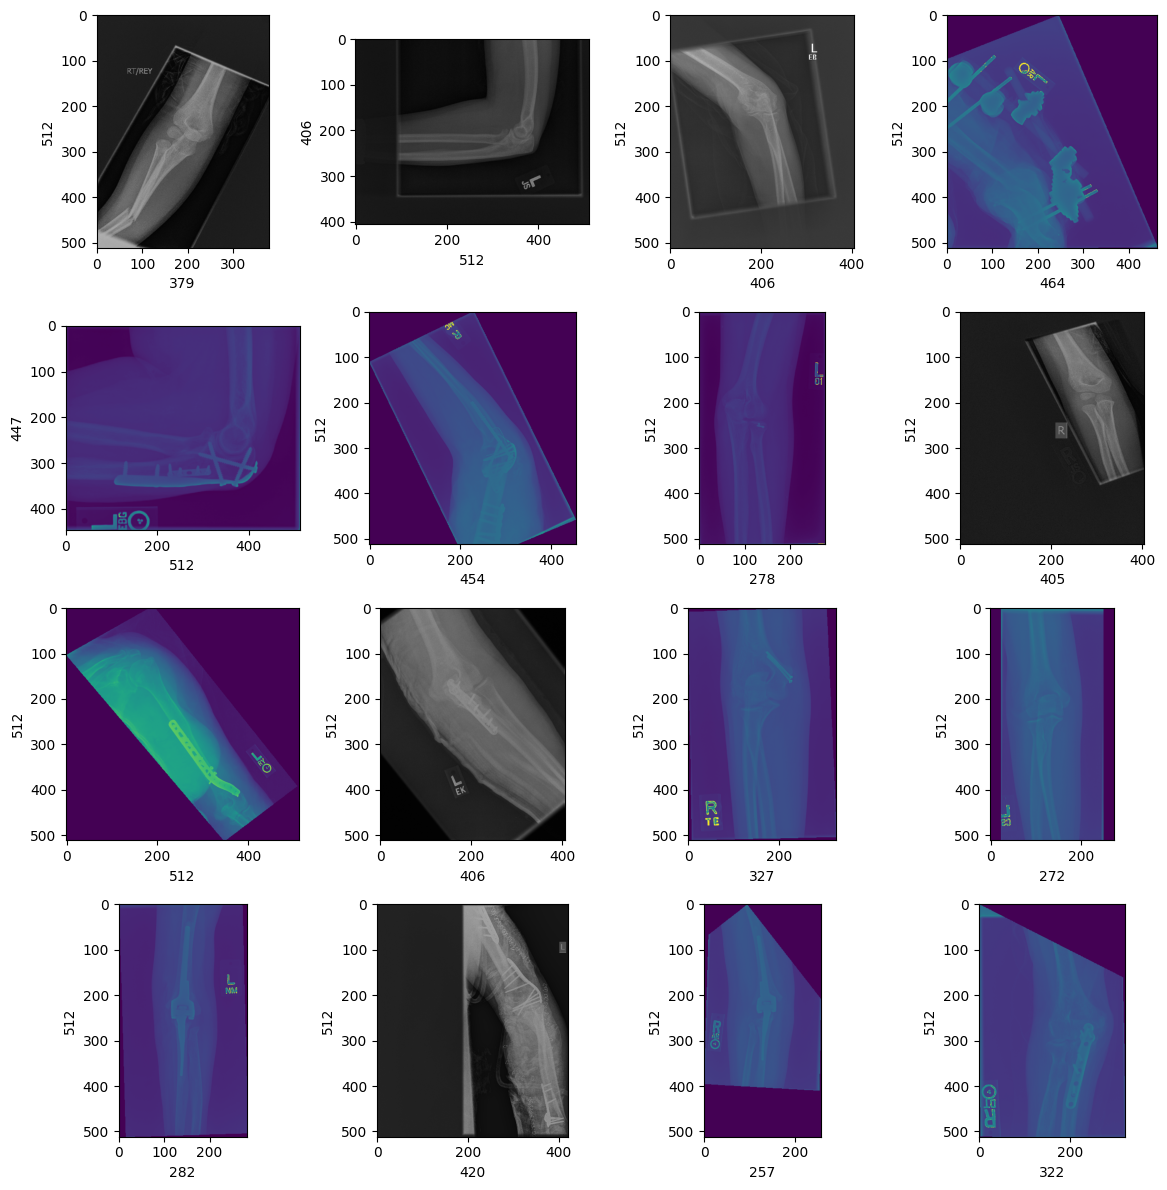

In [13]:
plt.figure(figsize=(12,12))
path = "/content/BF/train/XR_ELBOW_positive"
for i in range(1,17):
    plt.subplot(4,4,i)
    plt.tight_layout()
    rand_img = imread(path +'/'+ random.choice(sorted(os.listdir(path))))
    plt.imshow(rand_img)
    plt.xlabel(rand_img.shape[1], fontsize = 10)#width of image
    plt.ylabel(rand_img.shape[0], fontsize = 10)#height of image

In [14]:
train_dir = "/content/BF/train"

# Mapping of original folder names to new numeric names
class_mapping = {
    "XR_ELBOW_negative": "00",
    "XR_FINGER_negative": "01",
    "XR_FOREARM_negative": "02",
    "XR_HAND_negative": "03",
    "XR_SHOULDER_negative": "04",
    "XR_ELBOW_positive": "10",
    "XR_FINGER_positive": "11",
    "XR_FOREARM_positive": "12",
    "XR_HAND_positive": "13",
    "XR_SHOULDER_positive": "14"
}

# Rename the folders
for old_name, new_name in class_mapping.items():
    old_path = os.path.join(train_dir, old_name)
    new_path = os.path.join(train_dir, new_name)

    if os.path.exists(old_path):
        os.rename(old_path, new_path)
        print(f"Renamed {old_name} → {new_name}")
    else:
        print(f"Folder {old_name} not found!")

print("Folder renaming completed successfully!")


Renamed XR_ELBOW_negative → 00
Renamed XR_FINGER_negative → 01
Renamed XR_FOREARM_negative → 02
Renamed XR_HAND_negative → 03
Renamed XR_SHOULDER_negative → 04
Renamed XR_ELBOW_positive → 10
Renamed XR_FINGER_positive → 11
Renamed XR_FOREARM_positive → 12
Renamed XR_HAND_positive → 13
Renamed XR_SHOULDER_positive → 14
Folder renaming completed successfully!


In [15]:
for class_folder in sorted(os.listdir(train_dir)):
    class_path = os.path.join(train_dir, class_folder)

    if os.path.isdir(class_path):  # Ensure it's a directory
        images = sorted(os.listdir(class_path))  # Sort images to maintain order

        # Rename images sequentially
        for i, filename in enumerate(images, start=1):
            file_ext = os.path.splitext(filename)[1]  # Extract file extension
            new_name = f"{str(i).zfill(4)}{file_ext}"  # Zero-padded 4-digit number
            old_path = os.path.join(class_path, filename)
            new_path = os.path.join(class_path, new_name)

            os.rename(old_path, new_path)

        print(f"Renamed images in {class_folder}")

print("All files renamed successfully!")


Renamed images in 00
Renamed images in 01
Renamed images in 02
Renamed images in 03
Renamed images in 04
Renamed images in 10
Renamed images in 11
Renamed images in 12
Renamed images in 13
Renamed images in 14
All files renamed successfully!


In [18]:
!pip install opencv-python
import cv2

# Initialize dim1 and dim2 before the loop
dim1 = []
dim2 = []

for class_id in range(10):
    class_folder = os.path.join(train_dir, f"{class_id:02d}")

    if os.path.exists(class_folder):
        image_files = sorted(os.listdir(class_folder))

        for image_name in image_files:
            image_path = os.path.join(class_folder, image_name)

            img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

            if img is not None:
                dim1.append(img.shape[0])  # Image height
                dim2.append(img.shape[1])  # Image width

print(f"Total images processed: {len(dim1)}")
print(f"Min Height: {np.min(dim1)}, Max Height: {np.max(dim1)}, Average Height: {np.mean(dim1):.2f}")
print(f"Min Width: {np.min(dim2)}, Max Width: {np.max(dim2)}, Average Width: {np.mean(dim2):.2f}")

Total images processed: 14589
Min Height: 144, Max Height: 512, Average Height: 486.53
Min Width: 97, Max Width: 512, Average Width: 415.01


function ConnectButton(){
    console.log("Working");
    document.querySelector("#connect").click()
}
setInterval(ConnectButton,60000);

In [19]:
from PIL import Image

# Storage lists
images = []
label_id = []

# Loop through all class folders (00 to 09)
for class_id in range(10):
    class_folder = os.path.join(train_dir, f"{class_id:02d}")  # Ensure consistent naming (00, 01, ..., 09)

    if os.path.exists(class_folder):  # Ensure folder exists
        image_files = sorted(os.listdir(class_folder))  # Sort for consistency

        for image_name in image_files:
            image_path = os.path.join(class_folder, image_name)

            try:
                # Open and preprocess image
                img = Image.open(image_path).convert("L")  # Convert to grayscale to reduce memory
                img = img.resize((50, 50))  # Resize to (50,50)
                img = np.array(img)  # Convert to NumPy array

                images.append(img)
                label_id.append(class_id)  # Append corresponding label

            except Exception as e:
                print(f"Error loading {image_name}: {e}")  # Handle corrupt/missing files

# Convert lists to numpy arrays
images = np.array(images)
label_id = np.array(label_id)

print(f"Loaded {len(images)} images with labels.")
print(f"Image data shape: {images.shape}, Labels shape: {label_id.shape}")


Loaded 14589 images with labels.
Image data shape: (14589, 50, 50), Labels shape: (14589,)


In [20]:
images = np.array(images)
images = images/255

label_id = np.array(label_id)
label_id.shape

images.shape

label_counts = pd.DataFrame(label_id).value_counts()
label_counts.head()

,count
0,
4,4000
3,3839
1,2930
0,2764
2,1056


In [21]:
#Splitting the data
x_train, x_val, y_train, y_val = train_test_split(images, label_id , test_size = 0.2, random_state = 42)

y_train_cat = to_categorical(y_train)
y_val_cat = to_categorical(y_val)

In [22]:
#Reshape x_train and x_val to include the channel dimension
x_train = x_train.reshape(-1, 50, 50, 1) # Reshape to (num_samples, 50, 50, 1)
x_val = x_val.reshape(-1, 50, 50, 1)   # Reshape to (num_samples, 50, 50, 1)


model = Sequential()

# Update input_shape to (50, 50, 1)
model.add(Conv2D(filters = 64, kernel_size = (3,3), input_shape = (50, 50, 1), activation = 'relu', padding = 'same'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.5))

model.add(Conv2D(filters = 64, kernel_size = (3,3), activation = 'relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.5))

model.add(Flatten())
model.add(Dense(128, activation = 'relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation = 'softmax'))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [23]:
model.compile(loss = 'sparse_categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 50, 50, 64)          │             640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 25, 25, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 25, 25, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 23, 23, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 11, 11, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 11, 11, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 7744)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │         991,360 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,030,218 (3.93 MB)

 Trainable params: 1,030,218 (3.93 MB)

 Non-trainable params: 0 (0.00 B)

In [34]:
model.fit(x_train, y_train, epochs = 20, batch_size = 128, validation_data = (x_val, y_val), verbose = 2)

Epoch 1/20
92/92 - 1s - 16ms/step - accuracy: 0.9784 - loss: 0.0581 - val_accuracy: 0.9380 - val_loss: 0.3000
Epoch 2/20
92/92 - 1s - 15ms/step - accuracy: 0.9776 - loss: 0.0589 - val_accuracy: 0.9441 - val_loss: 0.2925
Epoch 3/20
92/92 - 3s - 28ms/step - accuracy: 0.9788 - loss: 0.0587 - val_accuracy: 0.9411 - val_loss: 0.3132
Epoch 4/20
92/92 - 1s - 15ms/step - accuracy: 0.9759 - loss: 0.0693 - val_accuracy: 0.9366 - val_loss: 0.3528
Epoch 5/20
92/92 - 3s - 27ms/step - accuracy: 0.9766 - loss: 0.0614 - val_accuracy: 0.9428 - val_loss: 0.3112
Epoch 6/20
92/92 - 3s - 28ms/step - accuracy: 0.9754 - loss: 0.0669 - val_accuracy: 0.9387 - val_loss: 0.3200
Epoch 7/20
92/92 - 3s - 27ms/step - accuracy: 0.9775 - loss: 0.0631 - val_accuracy: 0.9373 - val_loss: 0.3237
Epoch 8/20
92/92 - 3s - 28ms/step - accuracy: 0.9748 - loss: 0.0680 - val_accuracy: 0.9421 - val_loss: 0.2836
Epoch 9/20
92/92 - 3s - 28ms/step - accuracy: 0.9769 - loss: 0.0601 - val_accuracy: 0.9383 - val_loss: 0.3183
Epoch 10/2

<Axes: >

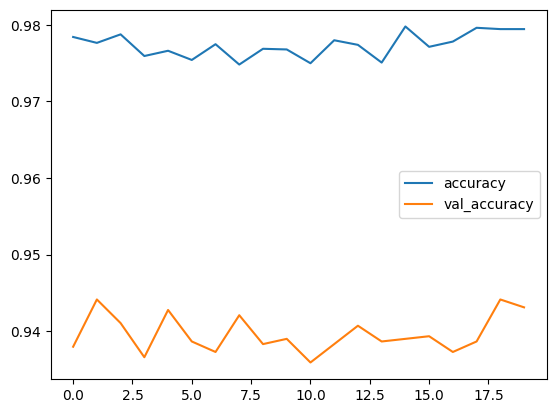

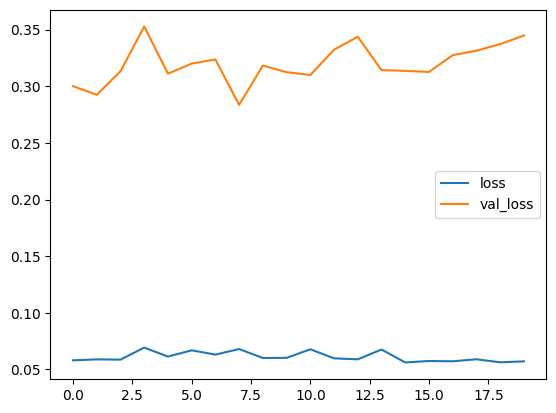

In [35]:
evaluation = pd.DataFrame(model.history.history)
evaluation[['accuracy', 'val_accuracy']].plot()
evaluation[['loss', 'val_loss']].plot()

In [36]:
model.save("XR_model.h5")

In [37]:
files.download('/content/XR_model.h5')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
import os
import shutil

# Define the source and destination paths
source_path = "/content/OCT/OCT2017 /test"  # Path to the folder with subfolders
destination_path = "/content/OCT/OCT2017 /testing"  # Path to the destination folder

# Create the destination folder if it doesn't exist
os.makedirs(destination_path, exist_ok=True)

# Iterate through subfolders and move files
for subfolder in os.listdir(source_path):
    subfolder_path = os.path.join(source_path, subfolder)

    # Check if it's a directory
    if os.path.isdir(subfolder_path):
        # Iterate through files in the subfolder
        for filename in os.listdir(subfolder_path):
            source_file_path = os.path.join(subfolder_path, filename)
            destination_file_path = os.path.join(destination_path, filename)

            # Move the file
            shutil.move(source_file_path, destination_file_path)

print("✅ All files moved to the 'testing' folder.")

✅ All files moved to the 'testing' folder.


In [38]:
test_path = '/content/BF/train/00'

In [39]:
#defining a function that will scale images
from PIL import Image

def scaling(test_images, test_path):
    images = []

    image_path = test_images

    for x in image_path:
        # Open the image, and ensure it is converted to grayscale
        img = Image.open(test_path + '/' + x).convert('L')
        img = img.resize((50,50))
        img = np.array(img)
        images.append(img)

    images = np.array(images)

    images = images/255

    return images

In [40]:
test_images = scaling(sorted(os.listdir(test_path)),test_path)

In [41]:
y_pred = model.predict(test_images)
y_pred = np.argmax(y_pred, axis=1)
y_pred

87/87 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step


array([0, 0, 0, ..., 0, 0, 0])

In [42]:
all_lables = ["XR_ELBOW_negative",
    "XR_FINGER_negative",
    "XR_FOREARM_negative",
    "XR_HAND_negative",
    "XR_SHOULDER_negative",
    "XR_ELBOW_positive",
    "XR_FINGER_positive",
    "XR_FOREARM_positive",
    "XR_HAND_positive",
    "XR_SHOULDER_positive"]

In [43]:
import os

def count_files_until(folder_path, stop_filename):
    count = 0
    found = False

    files = sorted(os.listdir(folder_path))

    for file in files:
        if file == stop_filename:
            found = True
            break
        count += 1

    if found:
        print(f"Found '{stop_filename}' after {count} files.")
    else:
        print(f"'{stop_filename}' not found in {folder_path}.")

    return count

folder = "/content/BF/train/00"  # Change this to your folder path
stop_file = "0013.png"  # Change this to the filename you want to stop at

count = count_files_until(folder, stop_file)
print(f"Total files before '{stop_file}': {count}")

Found '0013.png' after 12 files.
Total files before '0013.png': 12


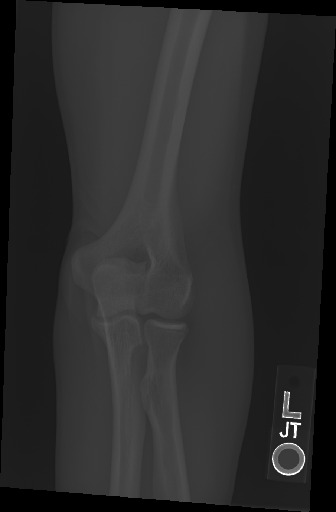

In [44]:
img = Image.open(test_path + '/0013.png')
img

In [45]:
print("Predicted label : ",all_lables[y_pred[count]])

Predicted label :  XR_ELBOW_negative
